In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
'''
import splitfolders
input_folder = "malnutrition/"
output = "dataset" 
splitfolders.ratio(input_folder, output,seed=42, ratio=(.8, .1, .1))
'''

'\nimport splitfolders\ninput_folder = "malnutrition/"\noutput = "dataset" \nsplitfolders.ratio(input_folder, output,seed=42, ratio=(.8, .1, .1))\n'

In [4]:
IMAGE_SIZE = 256
CHANNELS = 3

In [17]:
#using imagedatagenerator for data augmentation

train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)


train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"  # class mode -binary if two class
)

train_generator.class_indices

Found 408 images belonging to 4 classes.


{'Healthy_Image': 0,
 'Overnutrition_image': 1,
 'Stunting_Image': 2,
 'Wasting_Image': 3}

In [18]:
class_names = list(train_generator.class_indices.keys())
class_names

['Healthy_Image', 'Overnutrition_image', 'Stunting_Image', 'Wasting_Image']

In [19]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 49 images belonging to 4 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 55 images belonging to 4 classes.


# Build Model

In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# Compiling the Model

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
13/13 [==============================] - 22s 2s/step - loss: 1.3644 - accuracy: 0.3676 - val_loss: 1.2442 - val_accuracy: 0.4082
Epoch 2/20
13/13 [==============================] - 21s 2s/step - loss: 1.2188 - accuracy: 0.4314
Epoch 3/20
13/13 [==============================] - 21s 2s/step - loss: 1.1203 - accuracy: 0.4951
Epoch 4/20
13/13 [==============================] - 21s 2s/step - loss: 1.2063 - accuracy: 0.4265
Epoch 5/20
13/13 [==============================] - 21s 2s/step - loss: 1.1545 - accuracy: 0.4730
Epoch 6/20
13/13 [==============================] - 21s 2s/step - loss: 1.0938 - accuracy: 0.5221
Epoch 7/20
13/13 [==============================] - 21s 2s/step - loss: 1.1149 - accuracy: 0.5319
Epoch 8/20
13/13 [==============================] - 21s 2s/step - loss: 1.0648 - accuracy: 0.5270
Epoch 9/20
13/13 [==============================] - 21s 2s/step - loss: 1.0457 - accuracy: 0.5490
Epoch 10/20
13/13 [==============================] - 22s 2s/step - loss: 1.0

In [28]:
scores = model.evaluate(test_generator)
scores

2/2 [==============================] - 1s 449ms/step - loss: 0.8570 - accuracy: 0.6364


[0.856998085975647, 0.6363636255264282]

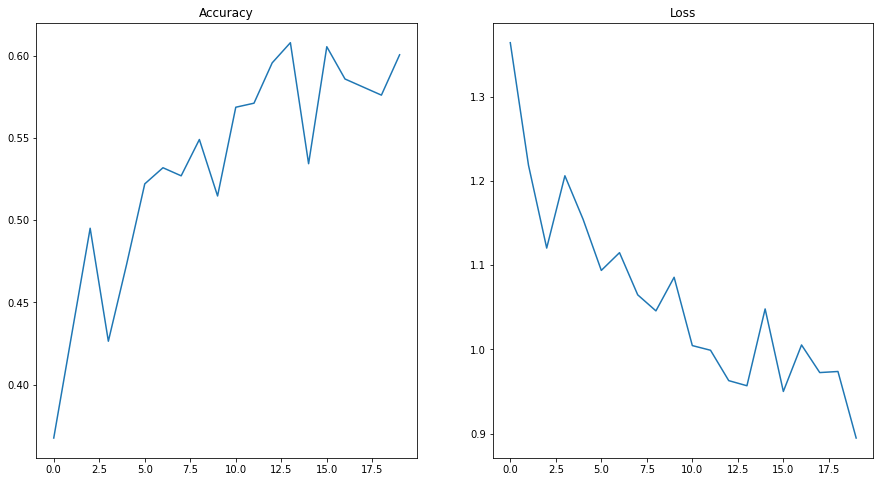

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(15,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Loss')
plt.plot(history.history['val_loss'])
plt.show()

first image to predict
actual label: Overnutrition_image
1/1 [==============================] - 0s 472ms/step
predicted label: Overnutrition_image


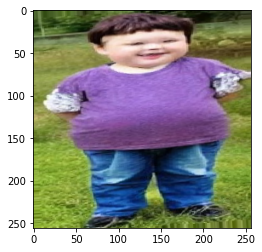

In [32]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


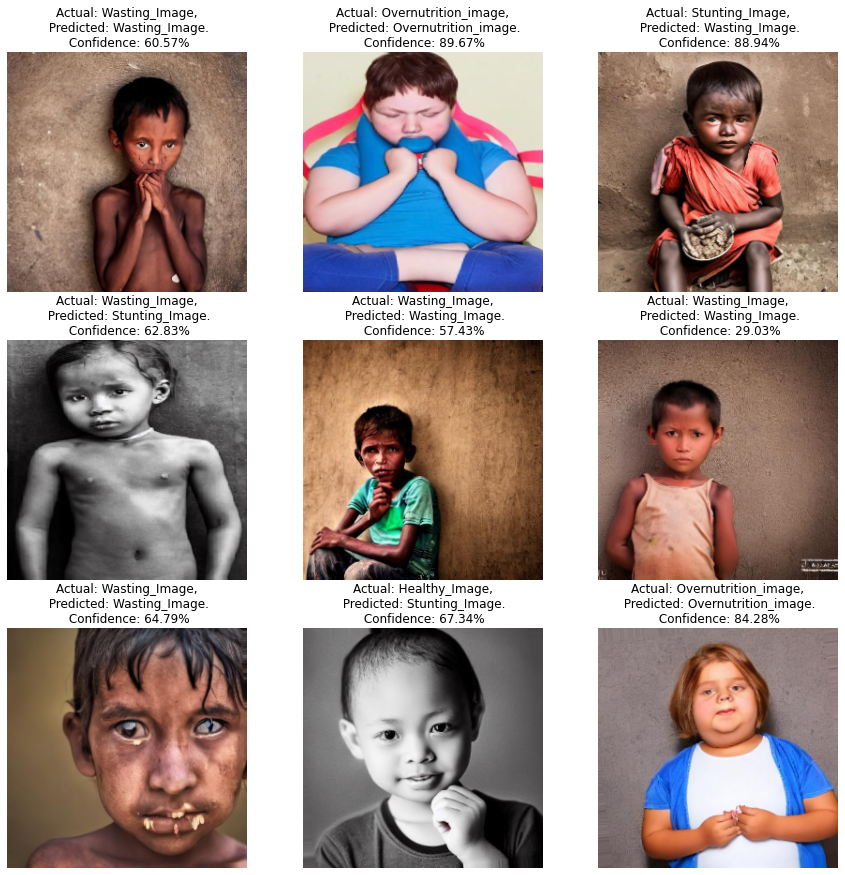

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break


In [35]:
import os
model_version=max([int(i) for i in os.listdir("../model2") + [0]])+1
model.save(f"../model2/{model_version}")

INFO:tensorflow:Assets written to: ../model2/1\assets


INFO:tensorflow:Assets written to: ../model2/1\assets


In [ ]:

INFO:tensorflow:Assets written to: ../model2/3/assets
model.save("../heathchecker.h5")